(5, 3)
(7, 4)
(7, 3)
(12, 5)
(8, 2)
(6, 2)
(4, 3)
(9, 4)
(6, 1)
(8, 3)
(6, 1)
(13, 2)
(4, 3)
(6, 0)
(6, 4)
(4, 1)
(9, 5)
(7, 2)
(8, 4)
(7, 3)


/Users/erinellefsen/PycharmProjects/Summer2015env/lib/python2.7/site-packages/pandas/io/excel.py:626: UserWarning: Installed openpyxl is not supported at this time. Use >=1.6.1 and <2.0.0.
  .format(openpyxl_compat.start_ver, openpyxl_compat.stop_ver))


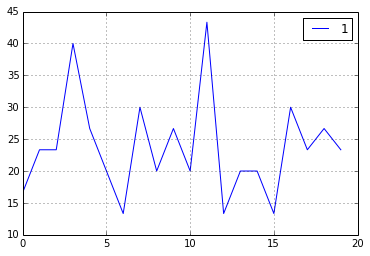

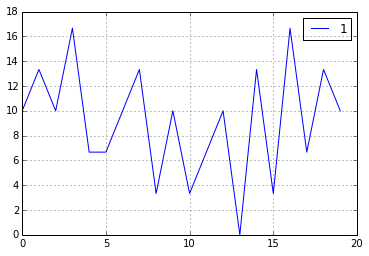

In [1]:
import graph
import pandas
import numpy
import matplotlib
%matplotlib inline

vaccinationpercent = 0
orderedpairlistHighEpi = []
orderedpairlistLowEpi = []

g = graph.Graph(10, .02, 0, .01, vaccinationpercent)   #k,p,r,%infected,%vaccinated
g.makeVerticesAndConnections(150,.01)  #g.makeVerticesAndConnections(210,.01)#prob they are connected
            #number of repetitions, num trials

while vaccinationpercent < 1.0:
    trials = 30
    HighEpi = 0
    FinalEpi = 0
    
    for x in range(trials):
        g.update(50)
        if g.getHighEpi():
            HighEpi +=1
        if g.getFinalEpi():
            FinalEpi +=1
        g.totalReset()
        
    
    orderedpairlistHighEpi = orderedpairlistHighEpi + [[vaccinationpercent,(float(HighEpi)/float(trials))*100]]
    orderedpairlistLowEpi = orderedpairlistLowEpi + [[vaccinationpercent, (float(FinalEpi)/float(trials))*100]]
    print(HighEpi, FinalEpi)
    y = (vaccinationpercent,(float(HighEpi)/float(trials))*100 , (float(FinalEpi)/float(trials))*100)
    
    vaccinationpercent += .05

    
df = pandas.DataFrame(orderedpairlistHighEpi)
df1 = pandas.DataFrame(orderedpairlistLowEpi)
del df[0]
del df1[0]
df.plot()
df1.plot()
